In [4]:
import pathlib
import textwrap
import os, getpass
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

model = genai.GenerativeModel('gemini-1.5-flash')

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [6]:
response = model.generate_content("What is the meaning of life?")
to_markdown(response.text)

> As a large language model, I don't have personal beliefs or experiences, so I can't tell you the meaning of life. That's a question that philosophers, theologians, and individuals have been grappling with for centuries, and there's no single right answer. 
> 
> Here's what I can offer:
> 
> **The meaning of life is a deeply personal question.** It's something you need to figure out for yourself, based on your own values, experiences, and beliefs. 
> 
> **Here are some common perspectives on the meaning of life:**
> 
> * **Finding happiness and fulfillment:** Many people believe that the meaning of life lies in pursuing happiness and fulfillment through meaningful relationships, passions, and contributing to something bigger than oneself.
> * **Leaving a legacy:**  Some believe that the meaning of life is about leaving a lasting impact on the world, whether through your work, family, or contributions to society.
> * **Spiritual enlightenment or connection:** For others, the meaning of life lies in achieving spiritual enlightenment, connecting with a higher power, or finding purpose through faith.
> * **Experiencing life to the fullest:** Some see the meaning of life as simply about experiencing all that life has to offer – joy, sorrow, love, loss, and everything in between.
> 
> **It's helpful to think about:**
> 
> * **What brings you joy and fulfillment?**
> * **What are your values and beliefs?**
> * **What kind of impact do you want to have on the world?**
> * **What do you want to be remembered for?**
> 
> The journey of finding meaning in life is ongoing. It's not about finding one definitive answer, but rather about exploring different perspectives, reflecting on your experiences, and shaping your own unique understanding of what life is all about. 


In [8]:
response.candidates

[index: 0
content {
  parts {
    text: "As a large language model, I don\'t have personal beliefs or experiences, so I can\'t tell you the meaning of life. That\'s a question that philosophers, theologians, and individuals have been grappling with for centuries, and there\'s no single right answer. \n\nHere\'s what I can offer:\n\n**The meaning of life is a deeply personal question.** It\'s something you need to figure out for yourself, based on your own values, experiences, and beliefs. \n\n**Here are some common perspectives on the meaning of life:**\n\n* **Finding happiness and fulfillment:** Many people believe that the meaning of life lies in pursuing happiness and fulfillment through meaningful relationships, passions, and contributing to something bigger than oneself.\n* **Leaving a legacy:**  Some believe that the meaning of life is about leaving a lasting impact on the world, whether through your work, family, or contributions to society.\n* **Spiritual enlightenment or conne

## Stream

In [ ]:
# response = model.generate_content("What is the meaning of life?", stream=True)
# for chunk in response:
#   print(chunk.text)
#   print("_"*80)

## Chat conversations

In [9]:
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [10]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a super smart toy that follows your instructions, uses numbers and lights to remember things, and shows you what it's thinking on a screen! 


In [12]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a super smart toy that follows your instructions, uses numbers and lights to remember things, and shows you what it's thinking on a screen! 


## Multi-turn conversations

In [5]:
messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer is like a really smart friend who can do lots of things! It has a special brain called a **processor** that helps it think and make decisions. 
> 
> The computer also has a **memory** where it stores information, like your favorite games or pictures. Think of it like a big bookshelf where you can keep all your things organized.
> 
> When you tell the computer what to do, it uses its processor to figure out how to do it and then uses its memory to store the information.  
> 
> For example, when you play a game, the computer uses its processor to make the characters move and its memory to remember what you've done in the game. 
> 
> The computer also has a special **screen** that lets you see what it's doing and a **keyboard** and **mouse** so you can talk to it and tell it what you want! 


In [6]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> Okay, so a computer is basically a machine that processes information. It works on a very simple principle: **taking input, processing it, and then producing output.** Think of it like a recipe: 
> 
> * **Input:** The ingredients are like the data you give the computer.
> * **Processing:** The steps in the recipe are like the instructions the computer follows to work on the data.
> * **Output:** The finished dish is like the result the computer gives you.
> 
> Here's a deeper dive into the parts that make this happen:
> 
> * **Central Processing Unit (CPU):** This is the brain of the computer, responsible for executing instructions. Imagine it as the chef following the recipe, making decisions, and controlling the entire process.
> * **Memory (RAM):** This is where the computer stores temporary data it's working with, like the ingredients you've laid out on the counter. 
> * **Storage (Hard Drive/SSD):** This is the long-term memory, where the computer stores the "recipes" (programs and files) and the "finished dishes" (saved data). 
> * **Input Devices:** These are how you give the computer instructions, like a keyboard, mouse, microphone, or a scanner. 
> * **Output Devices:** These are how the computer shows you the results, like a monitor, speakers, or printer.
> 
> The computer uses a language called **binary code**, which is a system of 0s and 1s, to represent information. It's how the CPU understands and processes instructions. This code is what makes the computer so versatile - it can be used for everything from playing games to writing essays to analyzing complex data.
> 
> So, while it may seem like a magical box, the computer is simply a very fast and efficient machine that follows instructions and manipulates information to produce results. 


## Count tokens

In [13]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

## Use embeddings

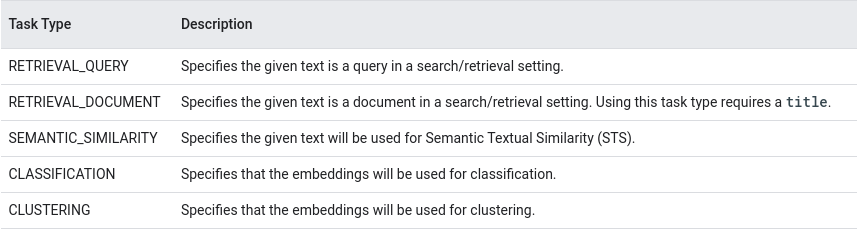

In [14]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


## Generation configuration

In [15]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [16]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Elara, a wisp of a girl with eyes the color of the summer sky, stumbled upon"
              }
            ],
            "role": "model"
          },
          "finish_reason": "MAX_TOKENS",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
          ]

In [17]:
text = response.text
if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'
to_markdown(text)

> Elara, a wisp of a girl with eyes the color of the summer sky, stumbled upon...